# Nicholas Bonet
# CMP464 Midterm Project - Titanic Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the training/test sets as pandas dataframes, assuming they're in same folder as this notebook
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

data_set = pd.concat([train_set, test_set], ignore_index=True) # combine the training/test sets into one
data_set = data_set.reindex(columns=train_set.columns.values) # reorder columns to original order

C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [3]:
# verify data is combined, and row indices/column order are correct
data_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Basic information of variables in the data set

PassengerId - ID # of the passenger

Survived - Whether the passenger survived or not, 1 for yes and 0 for no

Pclass - Ticket class of the passenger (1 = 1st, 2 = 2nd, 3 = 3rd)

Name, Sex, Age - Basic info of the passenger

SibSp - # of siblings/spouses of the passenger aboard the Titanic

ParCh - # of parents/children of the passenger aboard the Titanic

ticket - Ticket Number

Fare - Cost of ticket

Cabin - Cabin number of passenger

Embarked - Port which the passenger boarded the Titanic from (C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
# Summary of variables listed in the data set
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249F00193C8>,
      dtype=object)

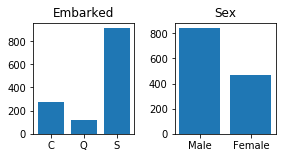

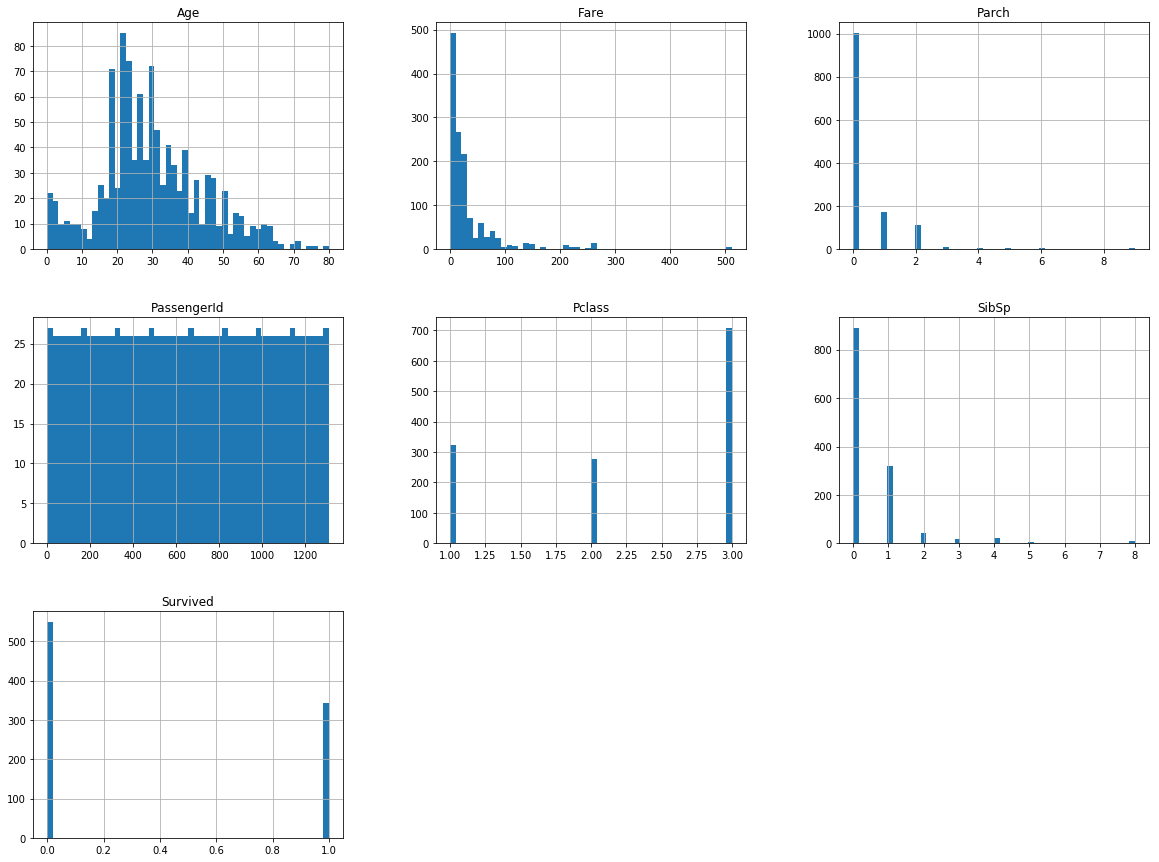

In [5]:
# Some graphical representations of some of the variables

# Embarked graph
embarked_x = ['C', 'Q', 'S']
embarked_y = [sum((data_set['Embarked']) == 'C'), sum((data_set['Embarked']) == 'Q'), sum((data_set['Embarked']) == 'S')]
plt.subplot(231).set_title('Embarked')
plt.bar(embarked_x, embarked_y)
plt.tight_layout()

# Sex graph
sex_x = ['Male', 'Female']
sex_y = [sum((data_set['Sex']) == 'male'), sum((data_set['Sex']) == 'female')]
plt.subplot(232).set_title('Sex')
plt.bar(sex_x, sex_y)
plt.tight_layout()

data_set.hist(bins=50, figsize=(20,15))

## Stage 1 - 4 - Data Cleansing

At first glance for the overall set, Cabin has the most null values, Survived is next, then Age.
Fare and Embarked are only missing 1-2, which should be acceptable for our use case.

When looking at just the training set though (after dropping Cabin), Age has 177 values missing, and Embarked only has 2 values missing.

In [6]:
# for our use, Cabin will be dropped as most of it's values are null
# dropping Name and Ticket as well since they would be more complicated to turn into useful numerical values
# PassengerId also isn't of much use to us for train set, will leave in test set for Kaggle submission
# drop from train set, not dropping from test as we will be splitting the training set later
train_set = train_set.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)
train_set.info()

test_set = test_set.drop(['Cabin', 'Name', 'Ticket'], axis=1)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [7]:
# filling null values of Age and Fare via Imputer

from sklearn.preprocessing import Imputer

# Save the two columns before temporarily dropping them
train_sex = train_set['Sex']
train_embarked = train_set['Embarked']

test_sex = test_set['Sex']
test_embarked = test_set['Embarked']

# drop the columns temporarily for imputer purposes
train_set = train_set.drop(['Sex', 'Embarked'], axis=1)
test_set = test_set.drop(['Sex', 'Embarked'], axis=1)
train_columns = train_set.columns.values
test_columns = test_set.columns.values

# take care of imputing the train set then adding the columns back
imputer_train = Imputer(strategy='median')
imputer_train.fit(train_set)

train_set = imputer_train.transform(train_set)
train_set = pd.DataFrame(train_set, columns=train_columns)
train_set['Sex'] = train_sex
train_set['Embarked'] = train_embarked

# impute the test set then add the columns back
imputer_test = Imputer(strategy='median')
imputer_test.fit(test_set)

test_set = imputer_test.transform(test_set)
test_set = pd.DataFrame(test_set, columns=test_columns)
test_set['Sex'] = test_sex
test_set['Embarked'] = test_embarked

train_set.info()
test_set.info()

# will take care of the 2 null values in training set for Embarked when that column is converted to numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null float64
Pclass      891 non-null float64
Age         891 non-null float64
SibSp       891 non-null float64
Parch       891 non-null float64
Fare        891 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
dtypes: float64(6), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null float64
Pclass         418 non-null float64
Age            418 non-null float64
SibSp          418 non-null float64
Parch          418 non-null float64
Fare           418 non-null float64
Sex            418 non-null object
Embarked       418 non-null object
dtypes: float64(6), object(2)
memory usage: 26.2+ KB


C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
# Stage 2 - 1 Data Preparation
# Need to convert values in Sex columns to numbers. (0 = female, 1 = male)
train_set.replace('male', 1, inplace=True)
train_set.replace('female', 0, inplace=True)
test_set.replace('male', 1, inplace=True)
test_set.replace('female', 0, inplace=True)
train_set.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null float64
Pclass      891 non-null float64
Age         891 non-null float64
SibSp       891 non-null float64
Parch       891 non-null float64
Fare        891 non-null float64
Sex         891 non-null int64
Embarked    889 non-null object
dtypes: float64(6), int64(1), object(1)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null float64
Pclass         418 non-null float64
Age            418 non-null float64
SibSp          418 non-null float64
Parch          418 non-null float64
Fare           418 non-null float64
Sex            418 non-null int64
Embarked       418 non-null object
dtypes: float64(6), int64(1), object(1)
memory usage: 26.2+ KB


In [9]:
train_set['Embarked'].value_counts() # find most common value for Embarked in test to fill nulls

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# convert Embarked column into 3 numeric columns (Embark_S, Embark_C, Embark_Q)
# train set first
train_set['Embarked'].fillna('S', inplace=True) # fill null values of Embarked with S since it's most common by far
embark_num = pd.get_dummies(train_set['Embarked'], prefix='Embark')
train_set['Embark_C'] = embark_num['Embark_C']
train_set['Embark_Q'] = embark_num['Embark_Q']
train_set['Embark_S'] = embark_num['Embark_S']

# now for test set
embark_num = pd.get_dummies(test_set['Embarked'], prefix='Embark')
test_set['Embark_C'] = embark_num['Embark_C']
test_set['Embark_Q'] = embark_num['Embark_Q']
test_set['Embark_S'] = embark_num['Embark_S']

train_set.head() # verify the new columns before dropping Embarked

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Embark_C,Embark_Q,Embark_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1,S,0,0,1
1,1.0,1.0,38.0,1.0,0.0,71.2833,0,C,1,0,0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0,S,0,0,1
3,1.0,1.0,35.0,1.0,0.0,53.1000,0,S,0,0,1
4,0.0,3.0,35.0,0.0,0.0,8.0500,1,S,0,0,1


In [11]:
test_set.head() # verify test set as well


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Embark_C,Embark_Q,Embark_S
0,892.0,3.0,34.5,0.0,0.0,7.8292,1,Q,0,1,0
1,893.0,3.0,47.0,1.0,0.0,7.0000,0,S,0,0,1
2,894.0,2.0,62.0,0.0,0.0,9.6875,1,Q,0,1,0
3,895.0,3.0,27.0,0.0,0.0,8.6625,1,S,0,0,1
4,896.0,3.0,22.0,1.0,1.0,12.2875,0,S,0,0,1


In [12]:
# drop Embarked from both sets now
train_set = train_set.drop(['Embarked'], axis=1)
train_set.info()

test_set = test_set.drop(['Embarked'], axis=1)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null float64
Pclass      891 non-null float64
Age         891 non-null float64
SibSp       891 non-null float64
Parch       891 non-null float64
Fare        891 non-null float64
Sex         891 non-null int64
Embark_C    891 non-null uint8
Embark_Q    891 non-null uint8
Embark_S    891 non-null uint8
dtypes: float64(6), int64(1), uint8(3)
memory usage: 51.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null float64
Pclass         418 non-null float64
Age            418 non-null float64
SibSp          418 non-null float64
Parch          418 non-null float64
Fare           418 non-null float64
Sex            418 non-null int64
Embark_C       418 non-null uint8
Embark_Q       418 non-null uint8
Embark_S       418 non-null uint8
dtypes: float64(6), int64(1), uint8(3)
memory usage: 24

In [13]:
# Feature scaling - only scaled age and fare in train set currently, maybe try pclass
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
column_order = train_set.columns.values

# Test scaling on age since there is a large range for this column
age_std = scaler.fit_transform(train_set['Age'].values.reshape(891,1))
train_set = train_set.drop(['Age'], axis=1)
train_set['Age'] = age_std

fare_std = scaler.fit_transform(train_set['Fare'].values.reshape(891,1))
train_set = train_set.drop(['Fare'], axis=1)
train_set['Fare'] = fare_std

train_set = train_set.reindex(columns=column_order) # reorder train set columns after changes
train_set.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null float64
Pclass      891 non-null float64
Age         891 non-null float64
SibSp       891 non-null float64
Parch       891 non-null float64
Fare        891 non-null float64
Sex         891 non-null int64
Embark_C    891 non-null uint8
Embark_Q    891 non-null uint8
Embark_S    891 non-null uint8
dtypes: float64(6), int64(1), uint8(3)
memory usage: 51.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null float64
Pclass         418 non-null float64
Age            418 non-null float64
SibSp          418 non-null float64
Parch          418 non-null float64
Fare           418 non-null float64
Sex            418 non-null int64
Embark_C       418 non-null uint8
Embark_Q       418 non-null uint8
Embark_S       418 non-null uint8
dtypes: float64(6), int64(1), uint8(3)
memory usage: 24

In [14]:
# Train/validation split
from sklearn.model_selection import train_test_split
train_set_X, val_set = train_test_split(train_set, test_size=0.20)
X = train_set_X.iloc[:, 1:10]
y = train_set_X.iloc[:, 0]
val_X = val_set.iloc[:, 1:10]
val_y = val_set.iloc[:, 0]

Cross Validation Mean: 0.7963065103910174
Test Accuracy: 0.7988826815642458
Confusion Matrix: [[101  16]
 [ 20  42]]
Precision Score: 0.7241379310344828
Recall Score: 0.6774193548387096


C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\n

(0, 1)

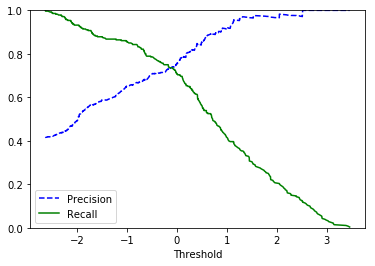

In [15]:
# Test with Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, precision_recall_curve, roc_curve

log_reg = LogisticRegression(n_jobs=-1, random_state=28272)
log_reg.fit(X, y)

# cross validation
cross_val = cross_val_score(log_reg, X, y, cv=5)
print('Cross Validation Mean:', cross_val.mean())

# test accuracy score with validation set
test_pred = log_reg.predict(val_X)
print("Test Accuracy:", accuracy_score(val_y, test_pred))

# confusion matrix/precision/recall
print("Confusion Matrix:", confusion_matrix(val_y, test_pred))
print("Precision Score:", precision_score(val_y, test_pred))
print("Recall Score:", recall_score(val_y, test_pred))

# precision/recall tradeoff
y_probas = cross_val_predict(log_reg, X, y, cv=5, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y, y_probas)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0, 1])

Text(0, 0.5, 'True Positive Rate')

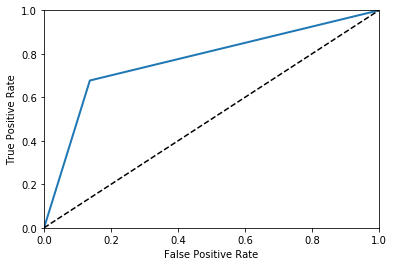

In [16]:
# ROC curve for Logistic Regression
fpr, tpr, thresholds = roc_curve(val_y, test_pred)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Cross Validation Mean: 0.7963262090022654
Test Accuracy: 0.7932960893854749
Confusion Matrix: [[100  17]
 [ 20  42]]
Precision Score: 0.711864406779661
Recall Score: 0.6774193548387096


Text(0, 0.5, 'True Positive Rate')

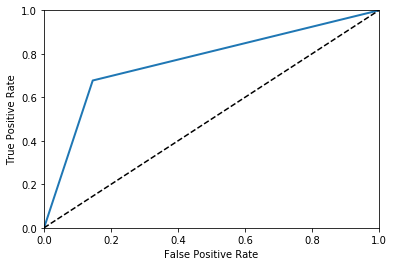

In [17]:
# KNN test
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X, y)

# cross validation
cross_val = cross_val_score(knn, X, y, cv=5)
print('Cross Validation Mean:', cross_val.mean())

# test accuracy score with validation set
test_pred_knn = knn.predict(val_X)
print("Test Accuracy:", accuracy_score(val_y, test_pred_knn))

# confusion matrix/precision/recall
print("Confusion Matrix:", confusion_matrix(val_y, test_pred_knn))
print("Precision Score:", precision_score(val_y, test_pred_knn))
print("Recall Score:", recall_score(val_y, test_pred_knn))

# in the case of KNN, a precision/recall tradeoff curve doesn't serve much purpose, as it's a binary classifier

# ROC curve
fpr, tpr, thresholds = roc_curve(val_y, test_pred_knn)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Cross Validation Mean: 0.7962832550860719
Test Accuracy: 0.7988826815642458
Confusion Matrix: [[101  16]
 [ 20  42]]
Precision Score: 0.7241379310344828
Recall Score: 0.6774193548387096


C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\

(0, 1)

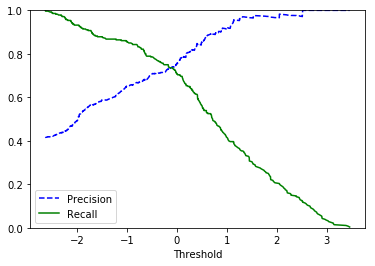

In [18]:
# Logistic Regression via GridSearch
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
log_reg_grid = LogisticRegression()
grid_search = GridSearchCV(\
                     estimator=log_reg_grid,
                     param_grid=[{'penalty' : ['l1', 'l2']}, {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}, 
                                 {'max_iter' : range(100, 1000)}], scoring='accuracy', cv=10, 
                                n_jobs=-1)

grid_search.fit(X, y)

best_model = grid_search.best_estimator_

# cross validation
cross_val = cross_val_score(best_model, X, y, cv=10, scoring='accuracy')
print('Cross Validation Mean:', cross_val.mean())

# test accuracy score with validation set
test_pred_gs = best_model.predict(val_X)
print("Test Accuracy:", accuracy_score(val_y, test_pred_gs))

# confusion matrix/precision/recall
print("Confusion Matrix:", confusion_matrix(val_y, test_pred_gs))
print("Precision Score:", precision_score(val_y, test_pred_gs))
print("Recall Score:", recall_score(val_y, test_pred_gs))

# precision/recall tradeoff
y_probas = cross_val_predict(log_reg_grid, X, y, cv=5, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y, y_probas)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0, 1])

C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Cross Validation Mean: 0.7948552425665102
Test Accuracy: 0.7988826815642458
Confusion Matrix: [[101  16]
 [ 20  42]]
Precision Score: 0.7241379310344828
Recall Score: 0.6774193548387096


C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\

(0, 1)

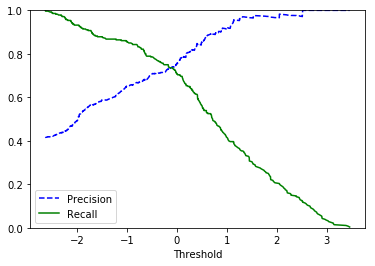

In [19]:
# Logistic Regression via RandomizedSearch
log_reg_random = LogisticRegression()

C_range = np.random.normal(1, 0.2, 10).astype(float)
C_range[C_range < 0] = 0.0001

params = {'penalty': ['l1', 'l2'],
         'C': C_range}
random_search = RandomizedSearchCV(\
                                  log_reg_random,
                                   params,
                                   n_iter=100,
                                   cv=5,
                                   n_jobs=-1,
                                   random_state=329438
                                  )
random_search.fit(X, y)

best_model = random_search.best_estimator_

# cross validation
cross_val = cross_val_score(best_model, X, y, cv=10, scoring='accuracy')
print('Cross Validation Mean:', cross_val.mean())

# test accuracy score with validation set
test_pred_rand = best_model.predict(val_X)
print("Test Accuracy:", accuracy_score(val_y, test_pred_rand))

# confusion matrix/precision/recall
print("Confusion Matrix:", confusion_matrix(val_y, test_pred_rand))
print("Precision Score:", precision_score(val_y, test_pred_rand))
print("Recall Score:", recall_score(val_y, test_pred_rand))

# precision/recall tradeoff
y_probas = cross_val_predict(log_reg_random, X, y, cv=5, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y, y_probas)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0, 1])